<a href="https://colab.research.google.com/github/nikensfra/Study-Case2-Data-mining/blob/main/STUDYCASE_2_DATMIN_KELOMPOK_J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modules

In [2]:
import pandas as pd

In [3]:
tabel = pd.DataFrame({'NIM': [11220940000021, 11220940000033, 11220940000073, 11200940000052],
                      'Nama': ['Nadira Afsarina Biya', 'Arjuananta Malik', 'Niken Safira', 'Kevin Septiyan Candra']})
tabel.rename(index={0: '1', 1: '2', 2: '3', 3: '4'}, inplace=True)
tabel

,NIM,Nama
1,11220940000021,Nadira Afsarina Biya
2,11220940000033,Arjuananta Malik
3,11220940000073,Niken Safira
4,11200940000052,Kevin Septiyan Candra


In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
import warnings; warnings.simplefilter('ignore')
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [5]:
import warnings; warnings.simplefilter('ignore')


In [6]:
!pip install kmodes

/bin/bash: line 1: pip install kmodes: command not found


# Load Data

In [7]:
# import data
try:
  mixue = pd.read_csv("data/jakarta.csv")

except:
  !mkdir data
  !wget -P data/ https://raw.githubusercontent.com/nikensfra/Study-Case2-Data-mining/main/MixITUp.xlsx

mixue = pd.read_excel("data/MixITUp.xlsx")
mixue

--2024-10-18 02:32:22--  https://raw.githubusercontent.com/nikensfra/Study-Case2-Data-mining/main/MixITUp.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20042 (20K) [application/octet-stream]
Saving to: ‘data/MixITUp.xlsx’

MixITUp.xlsx        100%[===================>]  19.57K  --.-KB/s    in 0.002s  

2024-10-18 02:32:22 (9.47 MB/s) - ‘data/MixITUp.xlsx’ saved [20042/20042]



,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


# Pre-processing

## Cek Data Duplikat

In [8]:
#mengecek data duplikat
mixue.duplicated().sum()

0

## Cek Missing Values

In [9]:
#menghitung jumlah mv pada setiap kolom
mixue.isnull().sum()

,0
ID,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,12
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [10]:
#mengatasi mv dengan drop(membuang) karena tipe data adalah kategorik
mixue.dropna(inplace=True)
mixue.isnull().sum()

,0
ID,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0


## Cek Tipe Data

In [11]:
#Melihat tipe data
mixue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    178 non-null    int64  
 1   Jenis Kelamin         178 non-null    object 
 2   Umur                  178 non-null    object 
 3   Pendapatan-per-bulan  178 non-null    int64  
 4   skor-pengeluaran      178 non-null    int64  
 5   Menikah               178 non-null    object 
 6   Kota                  178 non-null    object 
 7   Promo                 178 non-null    float64
 8   HariFav               178 non-null    object 
 9   FavFlavor             178 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.3+ KB


In [12]:
#mengubah tipe data
mixue[['Jenis Kelamin']] = mixue[['Jenis Kelamin']].astype('category')
mixue[['Umur']] = mixue[['Umur']].astype('int64')
mixue[['Menikah']] = mixue[['Menikah']].astype('category')
mixue[['Kota']] = mixue[['Kota']].astype('category')
mixue[['Promo']] = mixue[['Promo']].astype('category')
mixue[['HariFav']] = mixue[['HariFav']].astype('category')
mixue[['FavFlavor']] = mixue[['FavFlavor']].astype('category')

In [13]:
#mengecek kembali tipe data
mixue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    178 non-null    int64   
 1   Jenis Kelamin         178 non-null    category
 2   Umur                  178 non-null    int64   
 3   Pendapatan-per-bulan  178 non-null    int64   
 4   skor-pengeluaran      178 non-null    int64   
 5   Menikah               178 non-null    category
 6   Kota                  178 non-null    category
 7   Promo                 178 non-null    category
 8   HariFav               178 non-null    category
 9   FavFlavor             178 non-null    category
dtypes: category(6), int64(4)
memory usage: 9.4 KB


## Cek Noise

In [14]:
#mengecek elemen unik pada variabel "Kota"
mixue['Kota'].unique()

['Jakarta', 'Depok', 'Tangerang', 'JJakarta']
Categories (4, object): ['Depok', 'JJakarta', 'Jakarta', 'Tangerang']

In [15]:
#merubah elemen unik agar sesuai
mixue['Kota'] = mixue['Kota'].replace('JJakarta', 'Jakarta')

In [16]:
#terdapat noise pada variabel umur, yaitu terdapat umur 2 tahun, tetapi sudah memiliki gaji
mixue = mixue[~mixue['Umur'].isin([2])]

In [17]:
#mengecek elemen unik pada variabel 'Kota' kembali
mixue['Kota'].unique()

['Jakarta', 'Depok', 'Tangerang']
Categories (3, object): ['Depok', 'Jakarta', 'Tangerang']

In [18]:
#mengecek elemen unik pada variabel "FavFlavor"
mixue['FavFlavor'].unique()

[2, 6, 3, 7, 8, 0, 5, 4, 1, 9]
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [19]:
mixue['Promo'].unique()

[1.0, 2.0, 0.0, 3.0, 5.0]
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 5.0]

In [20]:
mixue.query("Promo != 5.0",  inplace=True)

In [21]:
#menghapus noise yang ada pada variabel 'FavFlavor'
mixue.query("FavFlavor != 9",  inplace=True)

## Seleksi Kolom

In [22]:
#Seleksi kolom yang nantinya akan di kolom
mixue.drop(columns=['ID', 'Menikah'], inplace=True )

In [23]:
mixue

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557,86,Depok,1.0,Minggu,6
2,Pria,51,15983606,41,Jakarta,2.0,Minggu,3
3,Pria,19,12704918,55,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967,42,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,Depok,1.0,Senin,0
196,Pria,57,15983606,51,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786,79,Depok,1.0,Senin,7
198,Wanita,23,1229508,94,Depok,0.0,Selasa,0


In [24]:
mixue.describe()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
count,175.00000,1.750000e+02,175.000000
mean,37.16000,1.859719e+07,50.914286
std,12.05579,1.064872e+07,25.989577
min,18.00000,0.000000e+00,1.000000
25%,27.00000,1.106557e+07,35.000000
50%,36.00000,1.885246e+07,51.000000
75%,47.00000,2.540984e+07,73.000000
max,60.00000,5.000000e+07,99.000000


## Cek Outlier pada variabel numerik

Outliers berdasarkan Z-Score:
Empty DataFrame
Columns: [Jenis Kelamin, Umur, Pendapatan-per-bulan, skor-pengeluaran, Kota, Promo, HariFav, FavFlavor]
Index: []
Outliers berdasarkan IQR:
   Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran   Kota Promo  \
66          Pria    30              50000000                83  Depok   1.0   

   HariFav FavFlavor  
66   Sabtu         3  


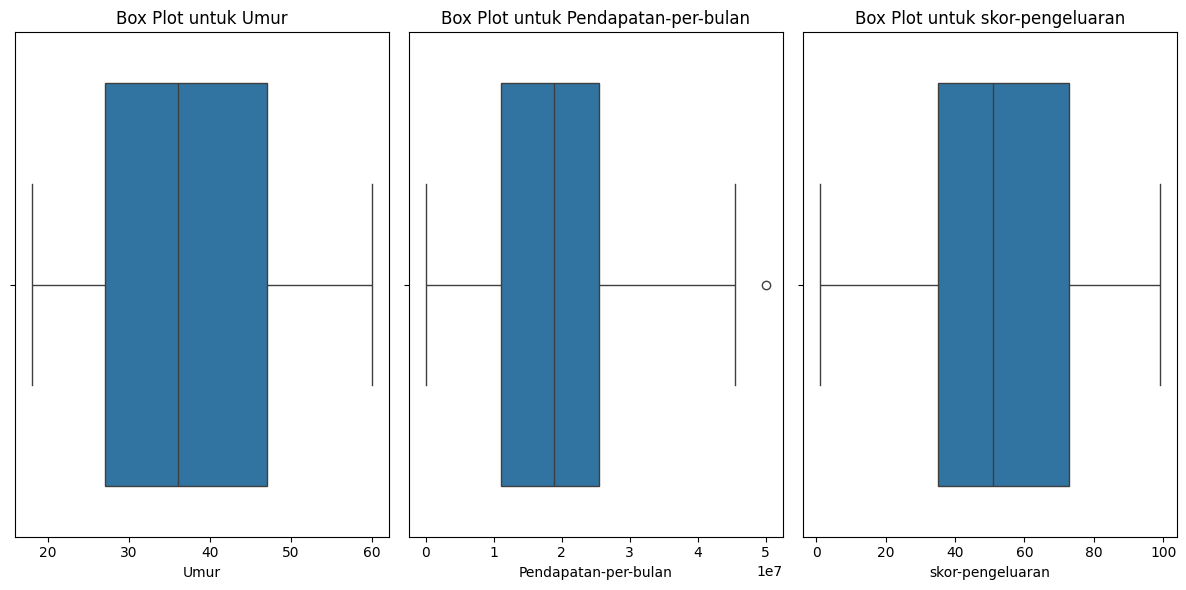

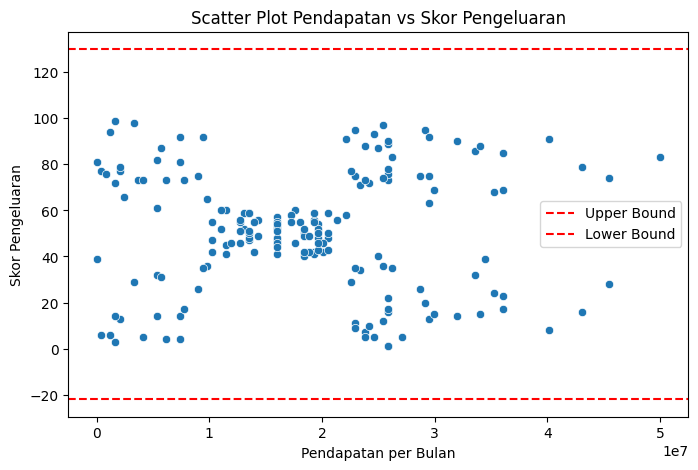

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 1. Menghitung Z-Score untuk variabel numerik
numeric_columns = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']
z_scores = np.abs(stats.zscore(mixue[numeric_columns]))

# Menentukan outlier berdasarkan Z-Score
outliers_z = (z_scores > 3).any(axis=1)

# Menampilkan outlier berdasarkan Z-Score
print("Outliers berdasarkan Z-Score:")
print(mixue[outliers_z])

# 2. Menghitung IQR untuk variabel numerik
Q1 = mixue[numeric_columns].quantile(0.25)
Q3 = mixue[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier berdasarkan IQR
outliers_iqr = ((mixue[numeric_columns] < lower_bound) | (mixue[numeric_columns] > upper_bound)).any(axis=1)

# Menampilkan outlier berdasarkan IQR
print("Outliers berdasarkan IQR:")
print(mixue[outliers_iqr])

# 3. Visualisasi dengan Box Plot
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i + 1)
    sns.boxplot(x=mixue[column])
    plt.title(f'Box Plot untuk {column}')
plt.tight_layout()
plt.show()

# 4. Visualisasi dengan Scatter Plot (contoh untuk dua variabel)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Pendapatan-per-bulan', y='skor-pengeluaran', data=mixue)
plt.title('Scatter Plot Pendapatan vs Skor Pengeluaran')
plt.xlabel('Pendapatan per Bulan')
plt.ylabel('Skor Pengeluaran')
plt.axhline(y=upper_bound['skor-pengeluaran'], color='r', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bound['skor-pengeluaran'], color='r', linestyle='--', label='Lower Bound')
plt.legend()
plt.show()


# **EDA**

## Statistika Deskripsif

In [26]:
mixue.describe()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
count,175.00000,1.750000e+02,175.000000
mean,37.16000,1.859719e+07,50.914286
std,12.05579,1.064872e+07,25.989577
min,18.00000,0.000000e+00,1.000000
25%,27.00000,1.106557e+07,35.000000
50%,36.00000,1.885246e+07,51.000000
75%,47.00000,2.540984e+07,73.000000
max,60.00000,5.000000e+07,99.000000


In [27]:
mixue['Kota'].value_counts()

,count
Kota,
Jakarta,76
Depok,55
Tangerang,44


<Axes: xlabel='Umur', ylabel='Count'>

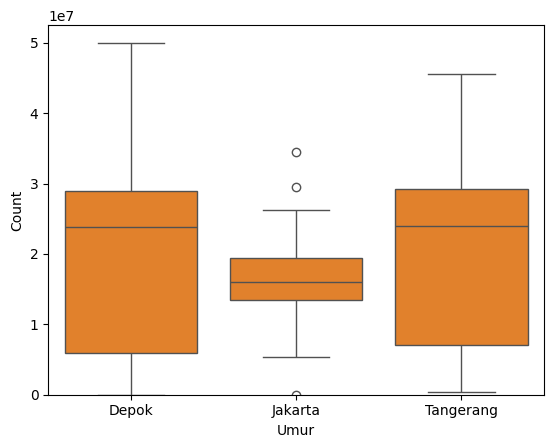

In [28]:
import seaborn as sns
sns.histplot(mixue['Umur'], bins=10)  # Plot distribusi umur
sns.boxplot(x='Kota', y='Pendapatan-per-bulan', data=mixue)  # Distribusi pendapatan per kota


Boxplot tersebut menunjukkan distribusi data umur di tiga lokasi: Depok, Jakarta, dan Tangerang.

1. Median umur di Jakarta lebih rendah dibandingkan dengan Depok dan Tangerang.
   
2. IQR di Depok dan Tangerang lebih besar dibandingkan dengan Jakarta, yang menunjukkan bahwa rentang umur di Jakarta lebih konsisten dan tersebar lebih sempit.
   
3. Depok dan Tangerang memiliki whiskers yang lebih panjang dibandingkan Jakarta, menandakan bahwa rentang umur di kedua wilayah tersebut lebih bervariasi.
   
4. Jakarta memiliki beberapa outlier di bagian bawah dan atas, yang mungkin mewakili individu dengan umur yang sangat berbeda dari mayoritas populasi.

Secara keseluruhan, distribusi umur di Jakarta lebih terpusat dan lebih sempit dibandingkan Depok dan Tangerang, yang memiliki variasi umur yang lebih lebar.

In [29]:
mixue.groupby('Kota')['skor-pengeluaran'].mean()  # Rata-rata skor pengeluaran per kota


,skor-pengeluaran
Kota,
Depok,81.109091
Jakarta,49.486842
Tangerang,15.636364


In [30]:
mixue.groupby('FavFlavor')['Umur'].mean()  # Umur rata-rata per rasa favorit


,Umur
FavFlavor,
0,32.916667
1,38.631579
2,42.937500
3,41.444444
4,38.500000
5,31.705882
6,37.214286
7,40.000000
8,35.611111


## Visualisasi

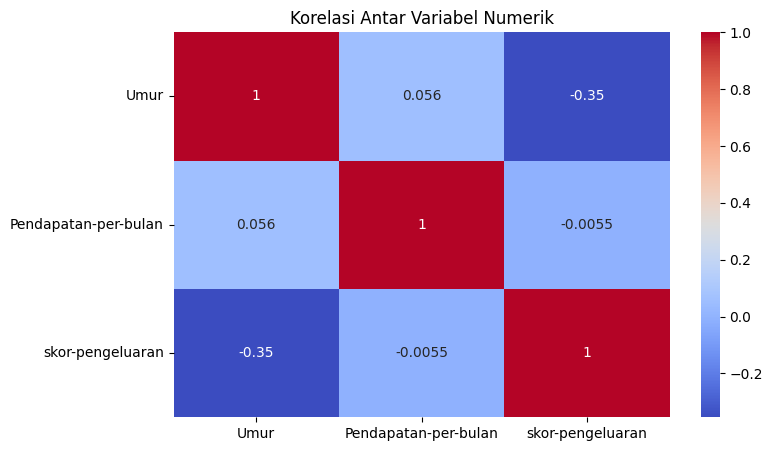

In [31]:
plt.figure(figsize=(8, 5))
sns.heatmap(mixue[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()


**INTERPRETASI**
1. **Umur dan Pendapatan-per-bulan**: Korelasi sangat rendah (0,04), menunjukkan hampir tidak ada hubungan antara umur dan pendapatan.
2. **Umur dan Skor Pengeluaran**: Korelasi negatif sedang (-0,35), artinya semakin tua seseorang, biasanya semakin rendah skor pengeluarannya.
3. **Pendapatan-per-bulan dan Skor Pengeluaran**: Korelasi sangat rendah (0,0068), yang berarti pendapatan hampir tidak berhubungan dengan skor pengeluaran.

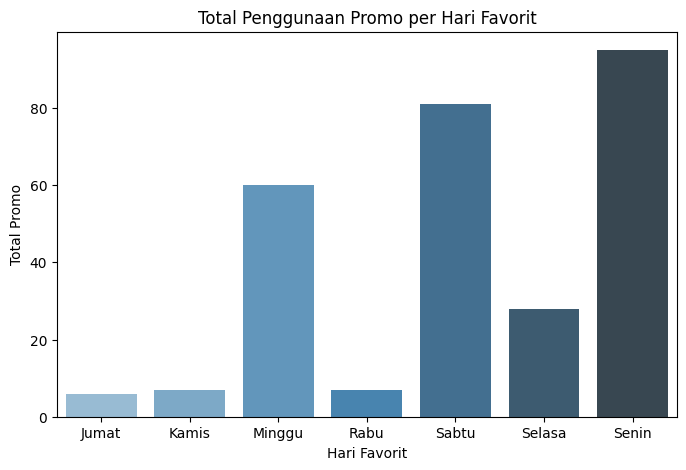

In [32]:
plt.figure(figsize=(8, 5))
# Convert 'Promo' to a numerical type before applying sum
promo_per_day = mixue.groupby('HariFav')['Promo'].apply(lambda x: x.astype(int).sum()).reset_index()
sns.barplot(x='HariFav', y='Promo', data=promo_per_day, palette='Blues_d')
plt.title('Total Penggunaan Promo per Hari Favorit')
plt.xlabel('Hari Favorit')
plt.ylabel('Total Promo')
plt.show()


**INTERPRETASI**
1. **Senin paling populer**: Penggunaan promo tertinggi terjadi pada hari Senin, menandakan banyak konsumen memanfaatkan promo di awal minggu.
2. **Akhir pekan juga tinggi**: Sabtu dan Minggu juga cukup populer, menunjukkan konsumen sering menggunakan promo di akhir pekan.
3. **Jum'at terendah**: Hari Rabu memiliki penggunaan promo paling rendah dibandingkan hari-hari lainnya.
4. **Fluktuasi penggunaan**: Penggunaan promo bervariasi secara signifikan sepanjang minggu, menunjukkan pola yang berbeda setiap harinya.

Pelanggan tampaknya lebih sering menggunakan promo pada awal minggu, terutama pada Senin dan akhir pekan seperti Sabtu dan Minggu.
Hari-hari di tengah minggu seperti Rabu, Jumat, dan Kamis adalah hari dengan jumlah penggunaan promo yang paling sedikit.

Informasi ini bisa berguna untuk strategi pemasaran, misalnya meningkatkan promosi atau penawaran khusus di hari-hari dengan penggunaan promo yang rendah, seperti Rabu dan Kamis, untuk meratakan trafik pelanggan sepanjang minggu.

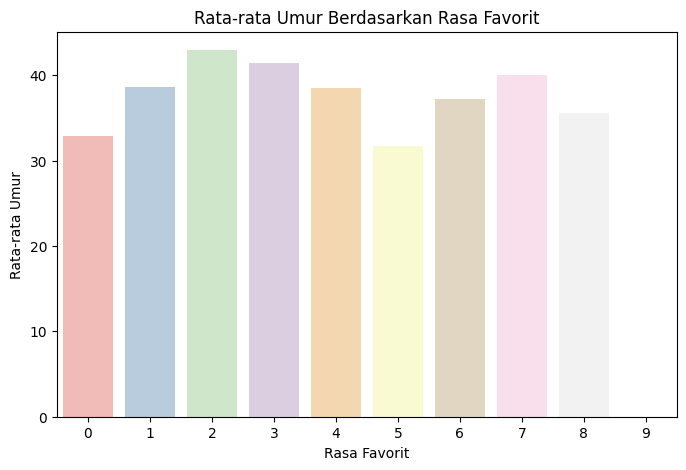

In [33]:
plt.figure(figsize=(8, 5))
flavor_per_age = mixue.groupby('FavFlavor')['Umur'].mean().reset_index()
sns.barplot(x='FavFlavor', y='Umur', data=flavor_per_age, palette='Pastel1')
plt.title('Rata-rata Umur Berdasarkan Rasa Favorit')
plt.xlabel('Rasa Favorit')
plt.ylabel('Rata-rata Umur')
plt.show()


**INTERPRETASI**
1. **Rasa 2 lebih disukai oleh kelompok yang lebih tua** (rata-rata umur di atas 40 tahun).
2.**Rasa 5 lebih populer di kalangan yang lebih muda** (rata-rata umur sekitar 30 tahun).
3. **Rata-rata umur untuk semua rasa berkisar antara 30 hingga 40 tahun,** menunjukkan variasi yang jelas dalam preferensi rasa berdasarkan usia

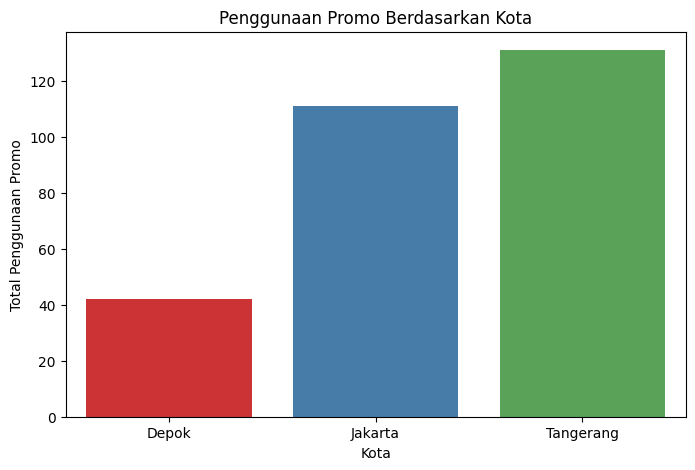

In [34]:
plt.figure(figsize=(8, 5))
# Convert 'Promo' to a numerical type before applying sum
promo_by_city = mixue.groupby('Kota')['Promo'].apply(lambda x: x.astype(int).sum()).reset_index()
sns.barplot(x='Kota', y='Promo', data=promo_by_city, palette='Set1')
plt.title('Penggunaan Promo Berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Total Penggunaan Promo')
plt.show()

**INTERPRETASI**
1. **Tangerang memiliki jumlah penggunaan promo tertinggi**, dengan total sekitar 130 kali penggunaan.
2. **Jakarta berada di posisi kedua**, dengan penggunaan promo sekitar 110 kali.
3. **Depok memiliki penggunaan promo terendah**, sekitar 50 kali

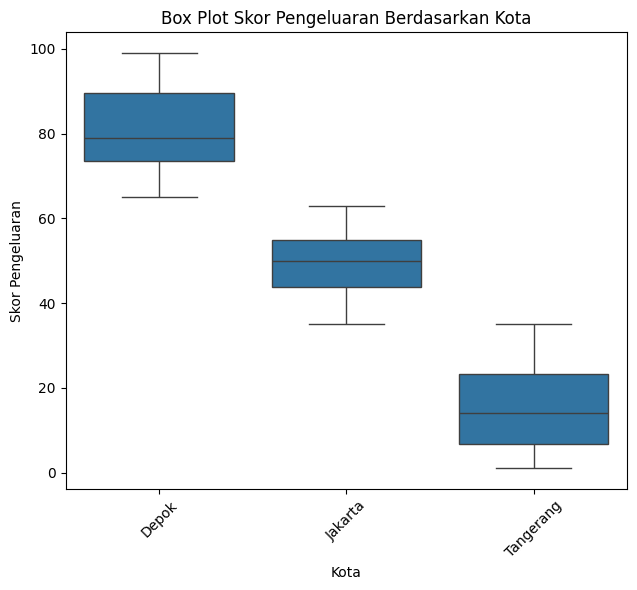

In [35]:
# Memastikan kolom yang digunakan ada dalam dataframe
if 'Kota' in mixue.columns and 'skor-pengeluaran' in mixue.columns:
    plt.figure(figsize=(18, 6))

    # 1. Box Plot untuk melihat distribusi skor pengeluaran berdasarkan kota
    plt.subplot(1, 3, 1)
    sns.boxplot(x='Kota', y='skor-pengeluaran', data=mixue)
    plt.title('Box Plot Skor Pengeluaran Berdasarkan Kota')
    plt.xlabel('Kota')
    plt.ylabel('Skor Pengeluaran')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Kota' atau 'skor-pengeluaran' tidak ditemukan dalam dataframe.")


**INTERPRETASI**
1. **Depok**: Skor pengeluaran tertinggi, dengan median sekitar 90 dan variasi yang cukup besar.
2. **Jakarta**: Skor pengeluaran sedang, dengan median sekitar 50 dan variasi moderat.
3. **Tangerang**: Skor pengeluaran terendah, dengan median sekitar 20 dan variasi yang lebih kecil.

Secara keseluruhan, Depok memiliki pengeluaran tertinggi dan paling bervariasi dibandingkan Jakarta dan Tangerang.

**INSIGHT**
1. **Usia mempengaruhi belanja dan preferensi**: Orang lebih tua cenderung mengeluarkan lebih sedikit dan memiliki preferensi rasa berbeda dari yang lebih muda. Strategi promosi bisa disesuaikan berdasarkan usia.

2. **Pola penggunaan promo bervariasi berdasarkan hari**: Senin dan akhir pekan adalah puncak penggunaan promo, sementara Jumat memiliki penggunaan promo terendah. Promosi dapat difokuskan untuk meningkatkan aktivitas belanja pada hari Jumat.

3. **Perbedaan geografis dalam pengeluaran**: Tangerang menggunakan promo paling banyak, tetapi pengeluarannya rendah dikarenakan rendahnya pendapatan per bulan. Depok memiliki pengeluaran tertinggi meskipun penggunaan promonya lebih rendah yang disebabkan tingginya pendapatan per bulan sehingga pelanggan tetap membeli tanpa promo. Strategi pemasaran harus disesuaikan dengan karakteristik kota masing-masing.

#Persiapan Model

## Data Numerik

In [36]:
kolom_numerik = ['Umur', 'Pendapatan-per-bulan']


In [37]:
# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(mixue[kolom_numerik ].describe().round(1))

# Standarisasi
mixue_std = StandardScaler().fit_transform(mixue[kolom_numerik])

# Membuat DataFrame
mixue_std = pd.DataFrame(data=mixue_std, index=mixue.index, columns=mixue[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(mixue_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(mixue_std.describe().round(0))


Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan
count  175.0                 175.0
mean    37.2            18597189.2
std     12.1            10648719.4
min     18.0                   0.0
25%     27.0            11065573.0
50%     36.0            18852459.0
75%     47.0            25409836.0
max     60.0            50000000.0

Hasil Standarisasi

       Umur  Pendapatan-per-bulan
0  0.984919             -0.516322
1 -0.429238              1.413544
2  1.151290             -0.246141
3 -1.510653             -0.554919
4  0.069876              0.139833

Statistik Hasil Standarisasi

        Umur  Pendapatan-per-bulan
count  175.0                 175.0
mean     0.0                   0.0
std      1.0                   1.0
min     -2.0                  -2.0
25%     -1.0                  -1.0
50%     -0.0                   0.0
75%      1.0                   1.0
max      2.0                   3.0


## Data Kategorik

In [38]:
kolom_kategorik = ['Jenis Kelamin','Kota', 'HariFav', 'FavFlavor', 'Promo', 'skor-pengeluaran']

In [39]:
from sklearn.preprocessing import LabelEncoder

# Membuat salinan dataframe
mixue_encode = mixue[kolom_kategorik].copy()

# Membuat dictionary untuk menyimpan encoder setiap kolom
encoders = {}

# Melakukan LabelEncoder untuk setiap kolom kategorikal
for col in kolom_kategorik:
    le = LabelEncoder()
    mixue_encode[col] = le.fit_transform(mixue_encode[col])

    # Simpan LabelEncoder yang digunakan agar bisa dilihat kembali label aslinya
    encoders[col] = le

# Menampilkan hasil encoding
print(mixue_encode.head())

# Mengetahui label dan nilai aslinya untuk suatu kolom
for col in kolom_kategorik:
    print(f"Kolom: {col}")
    print("Nilai Asli:", encoders[col].classes_)
    print("Label:", list(range(len(encoders[col].classes_))))
    print()

   Jenis Kelamin  Kota  HariFav  FavFlavor  Promo  skor-pengeluaran
0              2     1        4          2      1                41
1              2     0        2          6      1                69
2              1     1        2          3      2                30
3              1     1        3          7      1                44
4              2     1        6          8      2                31
Kolom: Jenis Kelamin
Nilai Asli: ['-' 'Pria' 'Wanita']
Label: [0, 1, 2]

Kolom: Kota
Nilai Asli: ['Depok' 'Jakarta' 'Tangerang']
Label: [0, 1, 2]

Kolom: HariFav
Nilai Asli: ['Jumat' 'Kamis' 'Minggu' 'Rabu' 'Sabtu' 'Selasa' 'Senin']
Label: [0, 1, 2, 3, 4, 5, 6]

Kolom: FavFlavor
Nilai Asli: [0 1 2 3 4 5 6 7 8]
Label: [0, 1, 2, 3, 4, 5, 6, 7, 8]

Kolom: Promo
Nilai Asli: [0. 1. 2. 3.]
Label: [0, 1, 2, 3]

Kolom: skor-pengeluaran
Nilai Asli: [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 20 22 23 24 26 28 29 31
 32 34 35 36 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 5

## Menggabungkan dat Numerik dan Kategorik

In [40]:
#menggabungkan kolom numerik dan kolom kategorik
mixue_model = mixue_encode.merge(mixue_std, left_index = True, right_index=True, how = 'left')
print(mixue_model.head())


   Jenis Kelamin  Kota  HariFav  FavFlavor  Promo  skor-pengeluaran      Umur  \
0              2     1        4          2      1                41  0.984919   
1              2     0        2          6      1                69 -0.429238   
2              1     1        2          3      2                30  1.151290   
3              1     1        3          7      1                44 -1.510653   
4              2     1        6          8      2                31  0.069876   

   Pendapatan-per-bulan  
0             -0.516322  
1              1.413544  
2             -0.246141  
3             -0.554919  
4              0.139833  


In [41]:
mixue_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         175 non-null    int64  
 1   Kota                  175 non-null    int64  
 2   HariFav               175 non-null    int64  
 3   FavFlavor             175 non-null    int64  
 4   Promo                 175 non-null    int64  
 5   skor-pengeluaran      175 non-null    int64  
 6   Umur                  175 non-null    float64
 7   Pendapatan-per-bulan  175 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 12.3 KB


In [42]:
mixue_model = mixue_model[['Umur','Kota', 'skor-pengeluaran', 'FavFlavor', 'Promo']]
mixue = mixue[['Umur','Kota', 'skor-pengeluaran', 'FavFlavor', 'Promo']]

In [43]:
X = mixue_model[['Umur','skor-pengeluaran', 'Kota', 'Promo', 'FavFlavor' ]]#.values
C = mixue_model['FavFlavor']#.values
print(X.shape)
mixue_model.sample(7)

(175, 5)


,Umur,Kota,skor-pengeluaran,FavFlavor,Promo
121,1.068105,1,34,7,2
74,-1.094724,0,52,6,1
98,0.236247,1,47,2,1
69,-0.761981,0,54,8,1
26,-0.179681,2,4,1,3
148,-1.344281,0,65,8,1
46,-1.593838,1,37,0,2


## Elbow Method

Text(0.5, 1.0, 'Elbow curve')

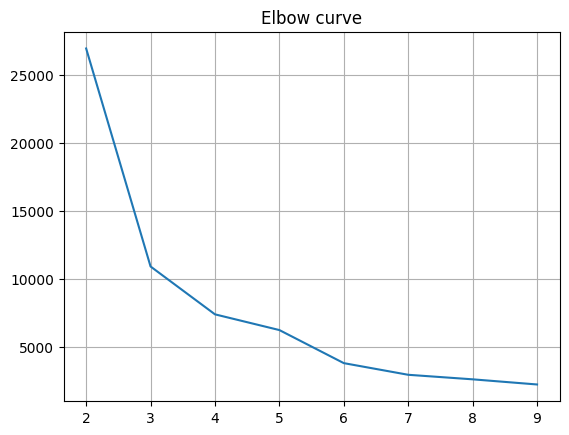

In [44]:

distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(mixue_model)
    distorsions.append(kmeans.inertia_)

plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')


 Jumlah kluster optimal adalah di sekitar 3 atau 4 kluster, karena setelah itu, peningkatan jumlah kluster hanya menghasilkan sedikit pengurangan pada SSE, sehingga tidak memberikan keuntungan yang signifikan dalam kualitas clustering. Pemilihan k=3 atau k=4 akan memberikan keseimbangan yang baik antara kompleksitas model dan kemampuan untuk menangkap struktur data.

# Clustering

## KMeans++

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

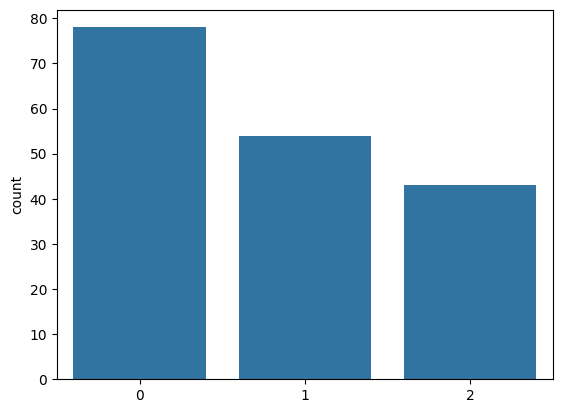

In [45]:
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++')
kmPP.fit(mixue_model)
C_kmpp = kmPP.predict(mixue_model)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

In [46]:
C_kmpp

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1,
       0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1,
       1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2,
       1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2],
      dtype=int32)

In [47]:

len(C_kmpp)

175

In [48]:
mixue['k-means++'] = C_kmpp

In [49]:
mixue

,Umur,Kota,skor-pengeluaran,FavFlavor,Promo,k-means++
0,49,Jakarta,52,2,1.0,0
1,32,Depok,86,6,1.0,1
2,51,Jakarta,41,3,2.0,0
3,19,Jakarta,55,7,1.0,0
4,38,Jakarta,42,8,2.0,0
...,...,...,...,...,...,...
195,31,Depok,73,0,1.0,1
196,57,Jakarta,51,5,1.0,0
197,35,Depok,79,7,1.0,1
198,23,Depok,94,0,0.0,1


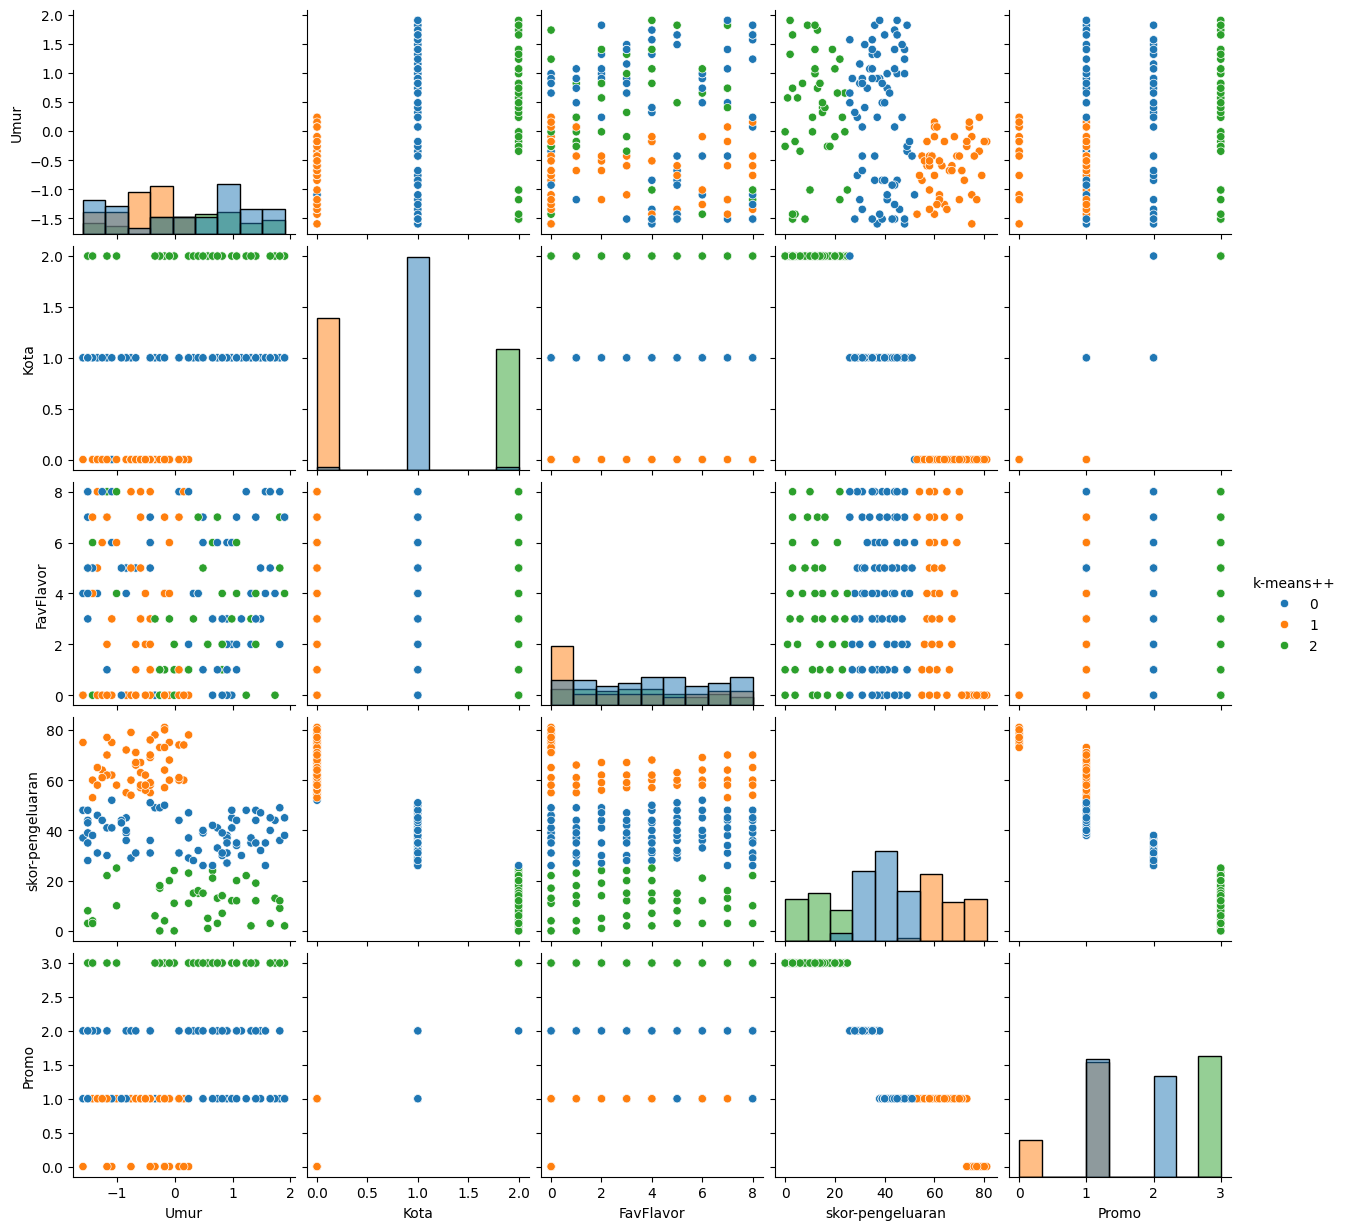

In [50]:
mixue_model['k-means++'] = C_kmpp
g = sns.pairplot(mixue_model[['Umur','Kota','FavFlavor', 'skor-pengeluaran','Promo', 'k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

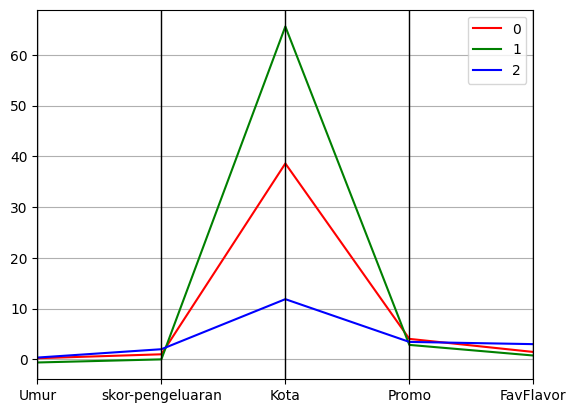

In [51]:
cols = ['Umur','skor-pengeluaran', 'Kota', 'Promo', 'FavFlavor']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

## DBScan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

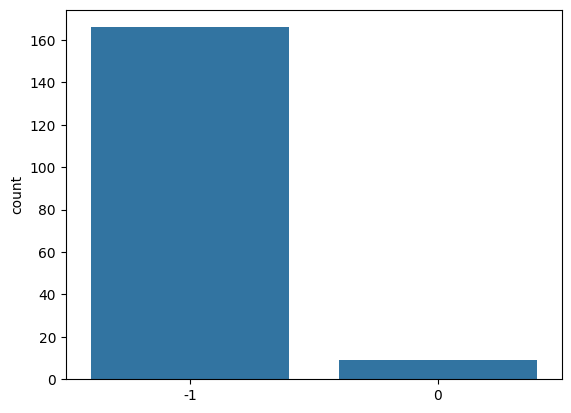

In [52]:
# Inisialisasi DBSCAN dengan parameter eps dan min_samples
dbscan = cluster.DBSCAN(eps=1.5, min_samples=5, metric='euclidean')

# Fit DBSCAN pada data X
dbscan.fit(mixue_model)

# Mendapatkan label cluster
C_db = dbscan.labels_.astype(int)

# Visualisasi distribusi cluster termasuk outliers (label -1)
sns.countplot(x=C_db)

# Melihat 10 label pertama
C_db[:10]

Algoritma DBSCAN yang diterapkan tidak berhasil mengelompokkan sebagian besar data karena sebagian besar titik data dianggap sebagai "noise" (cluster -1). Hal ini disebabkan oleh dua faktor utama:

1. Parameter DBSCAN yang tidak sesuai, seperti epsilon (ε) dan minimum jumlah titik tetangga (minPts), sehingga terlalu ketat dalam menentukan kelompok atau cluster.

2. Distribusi data yang tidak cukup padat, sehingga titik-titik data tidak memiliki kedekatan yang cukup untuk membentuk cluster yang valid.


## Hierarchical Clustering

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

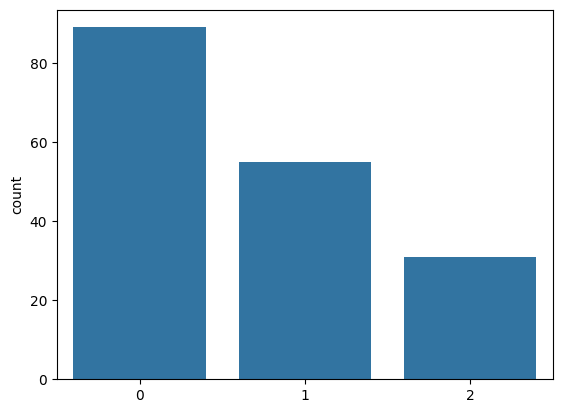

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Remove the 'affinity' argument
hierarchical = cluster.AgglomerativeClustering(n_clusters=3, linkage='average')
hierarchical.fit(mixue_model)
C_h = hierarchical.labels_.astype(int)

sns.countplot(x=C_h)
C_h[:10]

In [54]:
mixue['Hierarchical_C'] = C_h
mixue

,Umur,Kota,skor-pengeluaran,FavFlavor,Promo,k-means++,Hierarchical_C
0,49,Jakarta,52,2,1.0,0,0
1,32,Depok,86,6,1.0,1,1
2,51,Jakarta,41,3,2.0,0,0
3,19,Jakarta,55,7,1.0,0,0
4,38,Jakarta,42,8,2.0,0,0
...,...,...,...,...,...,...,...
195,31,Depok,73,0,1.0,1,1
196,57,Jakarta,51,5,1.0,0,0
197,35,Depok,79,7,1.0,1,1
198,23,Depok,94,0,0.0,1,1


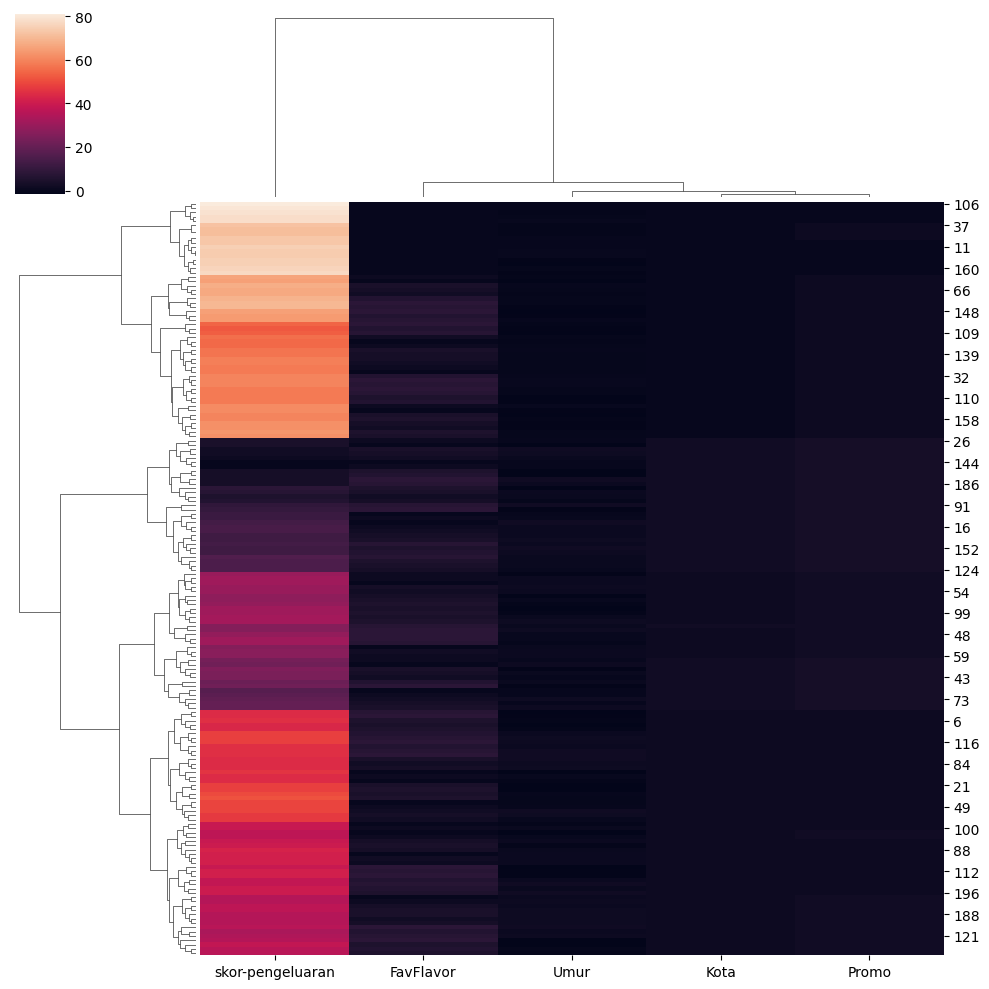

In [55]:
g = sns.clustermap(X, method="average")

## KMedoids

In [56]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.7 MB/s eta 0:00:00


array([1, 2, 1, 1, 1, 2, 1, 2, 1, 1])

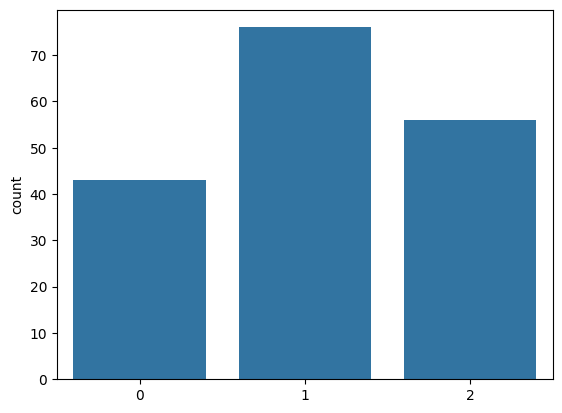

In [57]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, method='pam')
kmedoids.fit(X)
C_md = kmedoids.labels_
medoids = kmedoids.cluster_centers_
sns.countplot(x=C_md)
C_md[:10]

In [58]:
mixue['K-Medoids'] = C_md

Membandingkan dari ketiga metode clustering

In [59]:
mixue

,Umur,Kota,skor-pengeluaran,FavFlavor,Promo,k-means++,Hierarchical_C,K-Medoids
0,49,Jakarta,52,2,1.0,0,0,1
1,32,Depok,86,6,1.0,1,1,2
2,51,Jakarta,41,3,2.0,0,0,1
3,19,Jakarta,55,7,1.0,0,0,1
4,38,Jakarta,42,8,2.0,0,0,1
...,...,...,...,...,...,...,...,...
195,31,Depok,73,0,1.0,1,1,2
196,57,Jakarta,51,5,1.0,0,0,1
197,35,Depok,79,7,1.0,1,1,2
198,23,Depok,94,0,0.0,1,1,2


## Pilih 1 metode clustering

 Pilih **Hierarchical Clustering**. Karena ingin memahami hierarki dan hubungan antar cluster.

Pilih Hierarchical Clustering:

1. Tidak Perlu Menentukan Jumlah Cluster di Awal.
2. Visualisasi Hubungan Antar Cluster (Dendrogram).
3. Menangani Data dalam Berbagai Skala dan Ukuran.
4. Tidak Terbatas pada Bentuk Cluster.
5. Fleksibilitas dalam Menentukan Tingkat Detil Cluster.
6. Kecilnya Kebutuhan Prasangka tentang Data.
7. Cocok untuk Data Skala Kecil hingga Sedang.
8. Mengatasi Variasi Ukuran Cluster.
9. Menangkap Struktur Hierarki di dalam data.

In [60]:
 mixue = mixue.drop(['k-means++', 'K-Medoids'], axis=1)
 mixue

,Umur,Kota,skor-pengeluaran,FavFlavor,Promo,Hierarchical_C
0,49,Jakarta,52,2,1.0,0
1,32,Depok,86,6,1.0,1
2,51,Jakarta,41,3,2.0,0
3,19,Jakarta,55,7,1.0,0
4,38,Jakarta,42,8,2.0,0
...,...,...,...,...,...,...
195,31,Depok,73,0,1.0,1
196,57,Jakarta,51,5,1.0,0
197,35,Depok,79,7,1.0,1
198,23,Depok,94,0,0.0,1


In [61]:
mixue = mixue.rename(columns={'Hierarchical_C': 'Clustering'})

In [62]:
# Mapping nama kolom
mixue['Clustering'] = mixue['Clustering'].map({
0: 'Pelanggan Sedang',
1: 'Pelanggan Loyal',
2: 'Pelanggan Irit'
})

print(mixue.info())

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Umur              175 non-null    int64   
 1   Kota              175 non-null    category
 2   skor-pengeluaran  175 non-null    int64   
 3   FavFlavor         175 non-null    category
 4   Promo             175 non-null    category
 5   Clustering        175 non-null    object  
dtypes: category(3), int64(2), object(1)
memory usage: 6.7+ KB
None


In [63]:
mixue

,Umur,Kota,skor-pengeluaran,FavFlavor,Promo,Clustering
0,49,Jakarta,52,2,1.0,Pelanggan Sedang
1,32,Depok,86,6,1.0,Pelanggan Loyal
2,51,Jakarta,41,3,2.0,Pelanggan Sedang
3,19,Jakarta,55,7,1.0,Pelanggan Sedang
4,38,Jakarta,42,8,2.0,Pelanggan Sedang
...,...,...,...,...,...,...
195,31,Depok,73,0,1.0,Pelanggan Loyal
196,57,Jakarta,51,5,1.0,Pelanggan Sedang
197,35,Depok,79,7,1.0,Pelanggan Loyal
198,23,Depok,94,0,0.0,Pelanggan Loyal


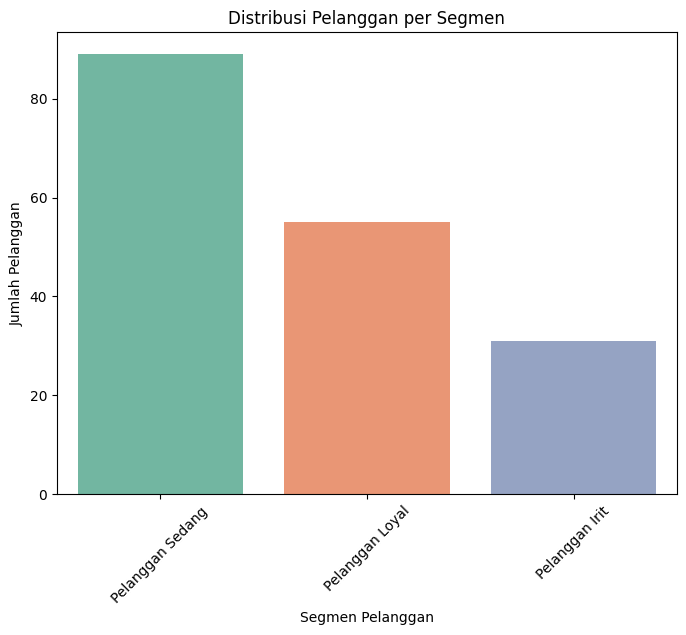

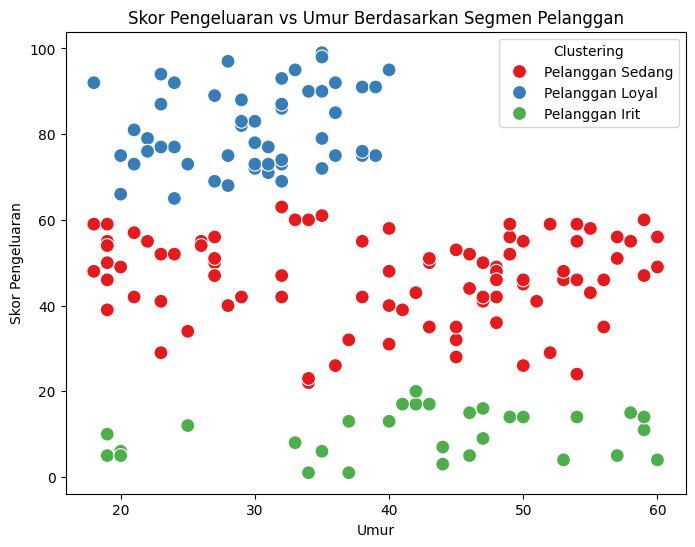

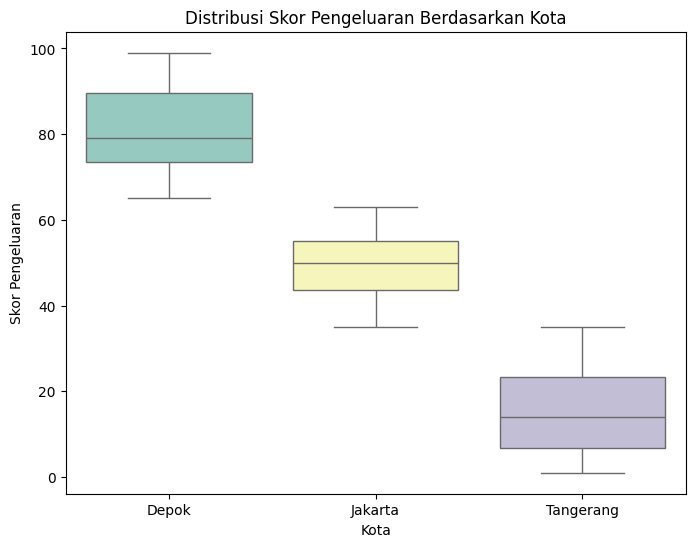

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Visualisasi Distribusi Pelanggan per Segmen
plt.figure(figsize=(8,6))
sns.countplot(x='Clustering', data=mixue, palette='Set2')
plt.title('Distribusi Pelanggan per Segmen')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

# Visualisasi Scatter Plot antara Skor Pengeluaran dan Umur berdasarkan Segmen
plt.figure(figsize=(8,6))
sns.scatterplot(x='Umur', y='skor-pengeluaran', hue='Clustering', data=mixue, palette='Set1', s=100)
plt.title('Skor Pengeluaran vs Umur Berdasarkan Segmen Pelanggan')
plt.xlabel('Umur')
plt.ylabel('Skor Pengeluaran')
plt.show()

# Visualisasi Skor Pengeluaran Berdasarkan Kota
plt.figure(figsize=(8,6))
sns.boxplot(x='Kota', y='skor-pengeluaran', data=mixue, palette='Set3')
plt.title('Distribusi Skor Pengeluaran Berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Skor Pengeluaran')
plt.show()


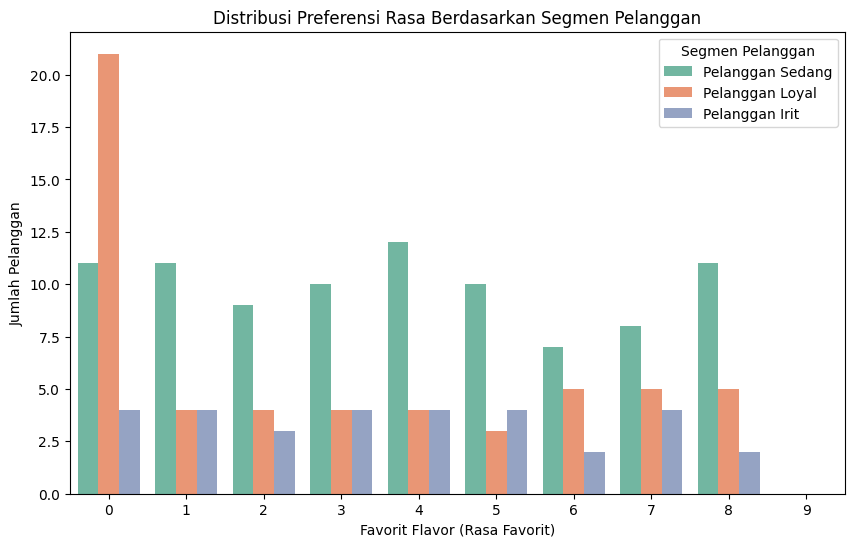

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(x='FavFlavor', hue='Clustering', data=mixue, palette='Set2')
plt.title('Distribusi Preferensi Rasa Berdasarkan Segmen Pelanggan')
plt.xlabel('Favorit Flavor (Rasa Favorit)')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Segmen Pelanggan', loc='upper right')
plt.show()

#**KESIMPULAN AKHIR**


### 1. **Segmentasi Pelanggan**
   - **Pelanggan Loyal**: Biasanya memiliki skor pengeluaran yang tinggi (contoh: skor pengeluaran 86, 73, 79, 94). Mereka tampaknya berbelanja lebih banyak dan sering menerima promo (nilai promo mayoritas 1.0).
   - **Pelanggan Sedang**: Memiliki skor pengeluaran yang bervariasi, tetapi umumnya berada di rentang sedang (contoh: skor pengeluaran 52, 41, 55, 42, 51). Mereka masih memanfaatkan promo, tetapi tidak selalu membeli dalam jumlah besar.
   - **Pelanggan Irit**: Kelompok ini memiliki skor pengeluaran yang rendah (contoh: 14). Mereka cenderung lebih hemat dan jarang menggunakan promo (nilai promo lebih tinggi, misalnya 3.0, yang mungkin menunjukkan penggunaan promo pada level yang minimal).

### 2. **Pengaruh Kota Terhadap Pengeluaran**
   - **Jakarta**: Sebagian besar pelanggan dari Jakarta termasuk dalam segmen _Pelanggan Sedang_, dengan skor pengeluaran yang cukup beragam, mulai dari 41 hingga 55.
   - **Depok**: Terlihat bahwa Depok memiliki lebih banyak pelanggan loyal, dengan skor pengeluaran yang lebih tinggi (contoh: 86, 73, 79, 94). Ini menunjukkan bahwa pelanggan dari Depok cenderung lebih sering berbelanja dan mungkin lebih tertarik pada produk yang ditawarkan.
   - **Tangerang**: Meskipun tidak banyak data yang disediakan tentang Tangerang, pelanggan dari kota ini tampaknya termasuk dalam segmen _Pelanggan Irit_, seperti terlihat dari skor pengeluaran rendah (14).

### 3. **Umur dan Pengeluaran**
   - **Pelanggan yang lebih tua** (misalnya usia di atas 40 tahun) cenderung berada dalam segmen _Pelanggan Sedang_, dengan pengeluaran di sekitar angka menengah (skor pengeluaran sekitar 40-55). Mereka memanfaatkan promo namun tidak secara signifikan meningkatkan pengeluaran.
   - **Pelanggan yang lebih muda** (usia 19-38 tahun) terlihat memiliki kecenderungan yang lebih bervariasi. Beberapa masuk dalam kategori _Pelanggan Loyal_ dengan skor pengeluaran tinggi (misalnya pelanggan berumur 32 dengan skor pengeluaran 86), sementara yang lainnya mungkin lebih moderat.

### 4. **Preferensi Rasa (FavFlavor)**
   - Variabel **FavFlavor** tampaknya menunjukkan preferensi rasa favorit yang dipilih pelanggan. _Pelanggan Loyal_ tampaknya lebih sering memilih angka **6 atau 7**, menunjukkan mungkin ada rasa yang sangat disukai dalam kelompok loyal ini. Sedangkan _Pelanggan Irit_ dan _Pelanggan Sedang_ lebih bervariasi dalam preferensi rasa mereka.

### 5. **Pengaruh Promo**
   - Nilai promo yang diberikan tampaknya cukup efektif pada _Pelanggan Loyal_, dengan sebagian besar dari mereka menerima nilai promo 1.0. Hal ini menunjukkan bahwa pelanggan loyal mungkin lebih responsif terhadap promosi dan berpotensi meningkatkan pengeluaran mereka.
   - Sebaliknya, pelanggan yang berada dalam segmen _Pelanggan Irit_ cenderung lebih jarang memanfaatkan promo (contoh: pelanggan dari Tangerang dengan nilai promo 3.0).

### 6. **Skor Pengeluaran dan Promo**
   - Ada hubungan yang menarik antara **promo** dan **skor pengeluaran**. Pelanggan dengan skor pengeluaran yang lebih tinggi biasanya menerima promo lebih rendah (nilai promo sekitar 1.0). Sedangkan pelanggan dengan skor pengeluaran yang lebih rendah (seperti pada segmen _Pelanggan Irit_) mendapatkan promo dengan nilai yang lebih tinggi (3.0), namun tidak meningkatkan pengeluaran mereka.

### **Insight Strategis:**
   - **Fokus Promosi pada Pelanggan Loyal**: Mengingat pelanggan loyal merespons promo dengan baik dan cenderung meningkatkan pengeluaran mereka, strategi pemasaran harus menargetkan kelompok ini dengan penawaran promo khusus untuk mempertahankan loyalitas mereka.
   - **Perluasan di Depok**: Kota Depok tampaknya memiliki jumlah _Pelanggan Loyal_ yang tinggi dengan skor pengeluaran yang besar. Ini bisa menjadi peluang untuk memperluas bisnis atau memperbanyak penawaran khusus di kota ini.
   - **Penetrasi Pasar Tangerang**: Pelanggan dari Tangerang tampak lebih hemat. Untuk menarik lebih banyak pelanggan atau meningkatkan pengeluaran mereka, mungkin perlu strategi promo atau produk yang lebih menarik untuk segmen ini.
   - **Personalisasi Berdasarkan Usia**: Segmen usia yang lebih tua dan muda menunjukkan pola pengeluaran yang berbeda. Usia yang lebih tua cenderung lebih stabil dalam pengeluaran, sedangkan usia yang lebih muda lebih bervariasi dan bisa jadi lebih terpengaruh oleh promosi.

Data ini memberikan wawasan yang sangat berguna untuk memformulasikan strategi pemasaran yang lebih terarah sesuai dengan karakteristik setiap segmen pelanggan.